# Lateness

- berücksichtigt auch eine negative Abweichung, also wenn ein Job früher fertiggestellt wurde als geplant.

$$
L_j = C_j - d_j
$$


- $L_j$: Lateness (Verspätung oder Frühfertigung) des Jobs $j$  
- $C_j$: tatsächliche Fertigstellungszeit (Completion Time) von Job $j$  
- $d_j$: Deadline bzw. geplanter Fertigstellungstermin von Job $j$

**Interpretation:**

- $L_j > 0$: Job ist **verspätet**  
- $L_j = 0$: Job ist **pünktlich**  
- $L_j < 0$: Job ist **zu früh** fertig

In [1]:
# Datenzugriff
from configs.config import get_path

# Utils
import src.utils.presenter as show
from src.utils.production_process import convert
from src.utils.production_process import initialize as init
from src.utils.analize import check_constrains as check

from src.utils.production_process import time_determination as term
from src.utils.production_process import gen_deadline as gen_deadline

# Solver Model
from src.models.cp import lateness_scheduling as cp_lateness
import src.models.heuristics.fcfs as fcfs

# Extern
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 21)

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
max_time = 60 * 5 # 5 min

In [4]:
basic_data_path = get_path("data", "basic")
day_count = 1

df_instance = pd.read_csv(basic_data_path / "instance.csv")
df_jssp, df_job_arrivals = init.create_production_orders_for_shifts(df_template=df_instance, shift_count=day_count,
                                                                 u_b_mmax= 0.94, shift_length=1440, shuffle=True,
                                                                 job_seed=40, arrival_seed=80)

df_job_times = gen_deadline.get_times_df(df_jssp, df_job_arrivals, fcfs.schedule_with_arrivals, target_service=1.0)
df_job_times


Schedule-Informationen:
  Makespan: 2400


,Job,Production_Plan_ID,Arrival,Deadline
0,0,0,49,848.0
1,1,1,130,1162.0
2,2,2,151,1300.0
3,3,3,226,1551.0
4,4,4,386,1181.0
5,5,5,464,1467.0
6,6,6,480,1322.0
7,7,7,506,1596.0
8,8,8,526,1734.0
9,9,9,535,1627.0


In [5]:
# Rundung für CP 
df_job_times["Arrival"] = np.floor(df_job_times["Arrival"]).astype(int)
df_job_times["Deadline"] = np.ceil(df_job_times["Deadline"]).astype(int)
df_job_times

,Job,Production_Plan_ID,Arrival,Deadline
0,0,0,49,848
1,1,1,130,1162
2,2,2,151,1300
3,3,3,226,1551
4,4,4,386,1181
5,5,5,464,1467
6,6,6,480,1322
7,7,7,506,1596
8,8,8,526,1734
9,9,9,535,1627


### a) Bestimmung der "Ready Time"

In [6]:
df_job_times['Ready Time'] = ((df_job_times['Arrival'] // 1440) + 1) * 1440
df_job_times

,Job,Production_Plan_ID,Arrival,Deadline,Ready Time
0,0,0,49,848,1440
1,1,1,130,1162,1440
2,2,2,151,1300,1440
3,3,3,226,1551,1440
4,4,4,386,1181,1440
5,5,5,464,1467,1440
6,6,6,480,1322,1440
7,7,7,506,1596,1440
8,8,8,526,1734,1440
9,9,9,535,1627,1440


### b) Processing Time

In [7]:
processing_time = df_jssp.groupby('Job')['Processing Time'].sum()
df_job_times = pd.merge(df_job_times, processing_time, on='Job')
df_job_times

,Job,Production_Plan_ID,Arrival,Deadline,Ready Time,Processing Time
0,0,0,49,848,1440,395
1,1,1,130,1162,1440,510
2,2,2,151,1300,1440,568
3,3,3,226,1551,1440,655
4,4,4,386,1181,1440,393
5,5,5,464,1467,1440,496
6,6,6,480,1322,1440,416
7,7,7,506,1596,1440,539
8,8,8,526,1734,1440,597
9,9,9,535,1627,1440,540


### c) Bestimmung des Slacks
> mit "Ready Time" statt Arrival 

In [8]:
df_job_times['Slack'] = df_job_times['Deadline'] - (df_job_times['Ready Time'] + df_job_times['Processing Time'])
df_job_times 

,Job,Production_Plan_ID,Arrival,Deadline,Ready Time,Processing Time,Slack
0,0,0,49,848,1440,395,-987
1,1,1,130,1162,1440,510,-788
2,2,2,151,1300,1440,568,-708
3,3,3,226,1551,1440,655,-544
4,4,4,386,1181,1440,393,-652
5,5,5,464,1467,1440,496,-469
6,6,6,480,1322,1440,416,-534
7,7,7,506,1596,1440,539,-383
8,8,8,526,1734,1440,597,-303
9,9,9,535,1627,1440,540,-353


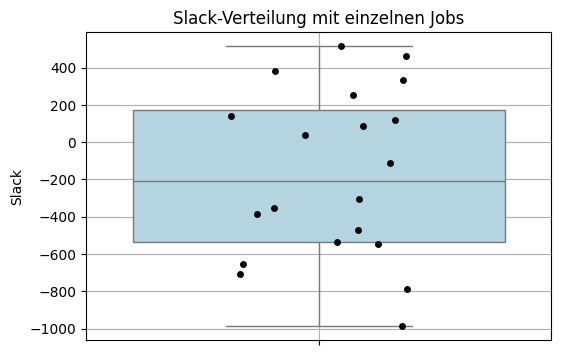

In [9]:
plt.figure(figsize=(6, 4))
sns.boxplot(y=df_job_times['Slack'], color='lightblue')
sns.stripplot(y=df_job_times['Slack'], color='black', size=5, jitter=0.2)
plt.title('Slack-Verteilung mit einzelnen Jobs')
plt.ylabel('Slack')
plt.grid(True)
plt.show()


In [10]:
q25 = df_job_times['Slack'].quantile(0.25)
print("25%-Quantil (Q1) von Slack:", q25)


25%-Quantil (Q1) von Slack: -536.5


### d) Anpassung der Deadlines
> Addition des absoluten minimalen "negativen Slacks"

In [11]:
df_job_times['Slack'].min()

np.int64(-987)

In [12]:
abs(df_job_times['Slack'].min())

np.int64(987)

In [13]:
min_slack = df_job_times['Slack'].min()

if min_slack < 0:
    df_job_times["Deadline"] = df_job_times["Deadline"] + abs(min_slack) + 120
df_job_times

,Job,Production_Plan_ID,Arrival,Deadline,Ready Time,Processing Time,Slack
0,0,0,49,1955,1440,395,-987
1,1,1,130,2269,1440,510,-788
2,2,2,151,2407,1440,568,-708
3,3,3,226,2658,1440,655,-544
4,4,4,386,2288,1440,393,-652
5,5,5,464,2574,1440,496,-469
6,6,6,480,2429,1440,416,-534
7,7,7,506,2703,1440,539,-383
8,8,8,526,2841,1440,597,-303
9,9,9,535,2734,1440,540,-353


### e) erneute Bestimmung des Slacks

In [14]:
df_job_times['Slack'] = df_job_times['Deadline'] - (df_job_times['Ready Time'] + df_job_times['Processing Time'])
df_job_times 

,Job,Production_Plan_ID,Arrival,Deadline,Ready Time,Processing Time,Slack
0,0,0,49,1955,1440,395,120
1,1,1,130,2269,1440,510,319
2,2,2,151,2407,1440,568,399
3,3,3,226,2658,1440,655,563
4,4,4,386,2288,1440,393,455
5,5,5,464,2574,1440,496,638
6,6,6,480,2429,1440,416,573
7,7,7,506,2703,1440,539,724
8,8,8,526,2841,1440,597,804
9,9,9,535,2734,1440,540,754


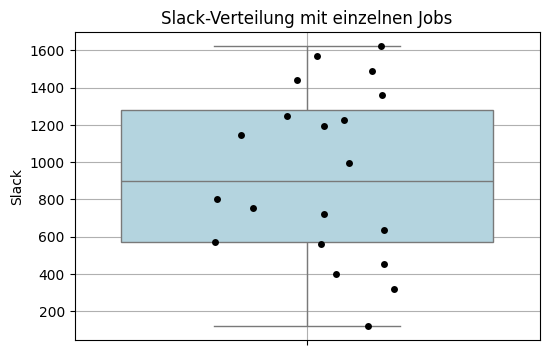

In [15]:
plt.figure(figsize=(6, 4))
sns.boxplot(y=df_job_times['Slack'], color='lightblue')
sns.stripplot(y=df_job_times['Slack'], color='black', size=5, jitter=0.2)
plt.title('Slack-Verteilung mit einzelnen Jobs')
plt.ylabel('Slack')
plt.grid(True)
plt.show()


## A) Summe der absoluten Lateness je Job (letze Operation)

$$
\min \sum_{j \in J} \left| C_j - d_j \right|
$$

- $J$: Menge aller Jobs  
- $C_j$: tatsächliche Endzeit (Completion Time) von Job $j$  
- $d_j$: Deadline von Job $j$  
- $\left| C_j - d_j \right|$: absolute Abweichung zur Deadline

**Erklärung:**  
Diese Zielfunktion minimiert die **Summe aller Abweichungen zur Deadline**, unabhängig davon, ob ein Job zu früh oder zu spät fertig wird.  
Sie fördert eine **gleichmäßige, zentrierte Fertigstellung** aller Jobs um ihre Soll-Zeitpunkte (Deadlines).



In [16]:
# Scheduling
df_schedule = cp_lateness.solve_jssp_sum(df_jssp, df_job_times, schedule_start = 1440,
                                         msg=False, timeLimit=max_time)
df_schedule 


Solver-Status           : OPTIMAL
Summe Absolute Lateness : 33.0
Best Objective Bound    : 33.0
Laufzeit                : 0.11 Sekunden


,Job,Production_Plan_ID,Operation,Machine,Arrival,Deadline,Start,Processing Time,End,Lateness,Tardiness,Earliness
0,0,0,0,M00,49,1955,1440,29,1469,-486,0,486
1,2,2,0,M01,151,2407,1440,91,1531,-876,0,876
2,4,4,0,M02,386,2288,1440,14,1454,-834,0,834
3,5,5,0,M02,464,2574,1454,84,1538,-1036,0,1036
4,1,1,0,M00,130,2269,1469,43,1512,-757,0,757
...,...,...,...,...,...,...,...,...,...,...,...,...
195,17,3,7,M03,1285,3717,3339,98,3437,-280,0,280
196,16,1,9,M08,1254,3393,3363,30,3393,0,0,0
197,17,3,8,M09,1285,3717,3437,22,3459,-258,0,258
198,18,5,9,M07,1397,3507,3482,25,3507,0,0,0


In [17]:
last_ops = df_schedule.sort_values(['Job', 'Operation']).drop_duplicates('Job', keep='last')
print(show.count_column_grouped(last_ops, 'Lateness'))

label
<-180           0
-180 - -120     0
-120 - -60      0
-60 - 0         0
0              19
0 - 60          1
60 - 120        0
120 - 180       0
>180            0
Name: count, dtype: int64


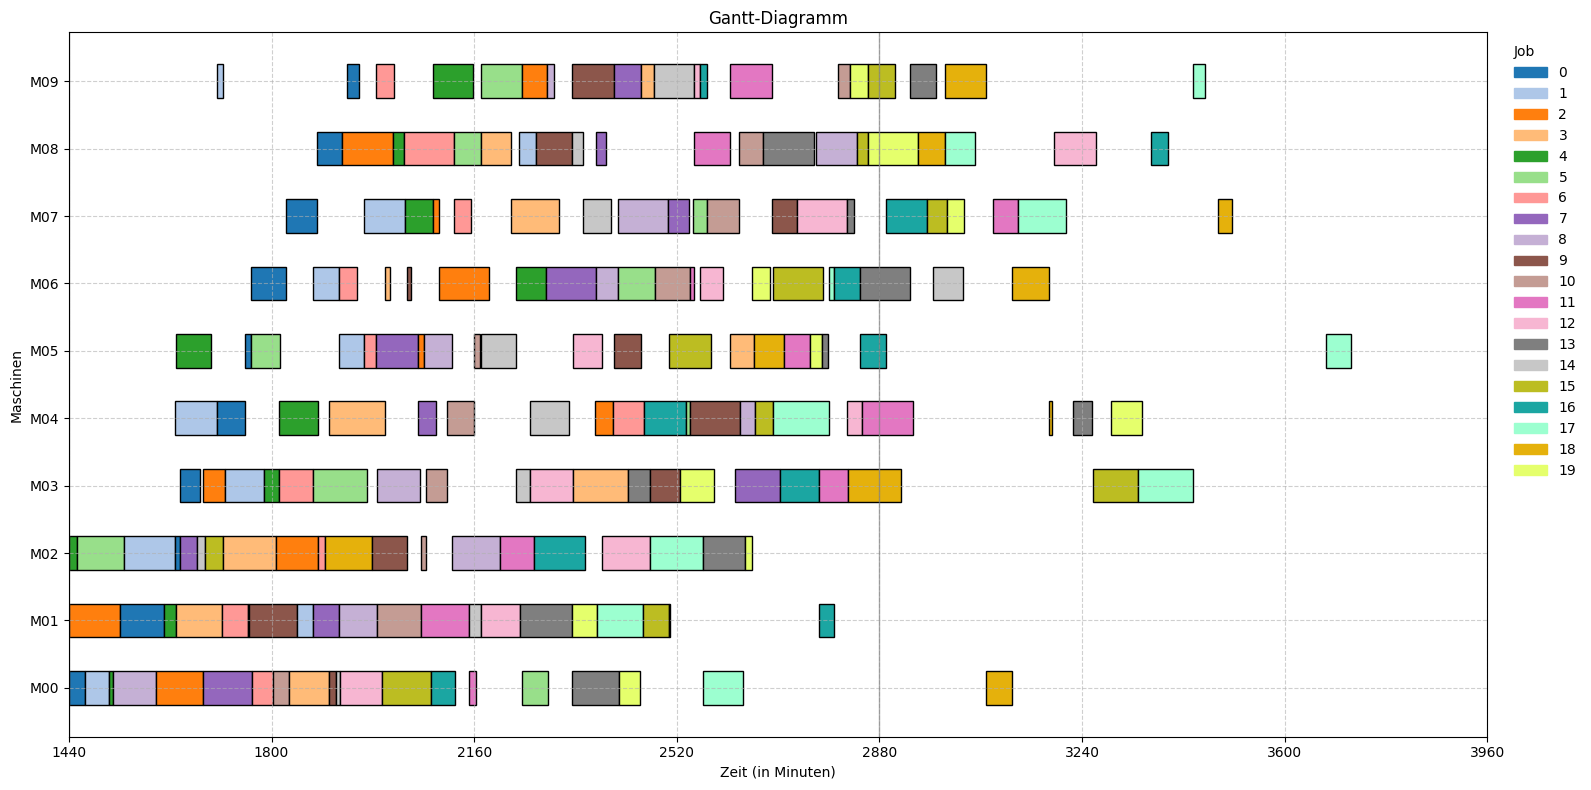

+ Keine Maschinenkonflikte gefunden
+ Alle Gruppen wurden in korrekter Operationsreihenfolge ausgeführt.
+ Alle technologischen Abhängigkeiten wurden eingehalten.
+ Alle Operation starten erst nach Arrival des Job


True

In [18]:
show.plot_gantt(df_schedule, perspective="Machine")
check.is_machine_conflict_free(df_schedule)
check.is_operation_sequence_correct(df_schedule)
check.is_job_timing_correct(df_schedule)
check.is_start_correct(df_schedule)

## B) Summe der Lateness minimieren (gewichtet Tardiness und Earliness)

### Zielfunktion

$$
\min \sum_{j \in J} \left( w_t \cdot \max(C_j - d_j,\ 0) + w_e \cdot \max(d_j - C_j,\ 0) \right)
$$


- $J$: Menge aller Jobs  
- $C_j$: tatsächliche Endzeit (Completion Time) des letzten Arbeitsschritts von Job $j$  
- $d_j$: Deadline (Soll-Endzeitpunkt) von Job $j$  
- $w_t$: Gewichtung der **Tardiness** (Verspätung)  
- $w_e$: Gewichtung der **Earliness** (Frühfertigkeit)  
- $\max(C_j - d_j,\ 0)$: positive Verspätung  
- $\max(d_j - C_j,\ 0)$: positive Frühfertigkeit  

### Erklärung

Diese Zielfunktion minimiert die gewichtete Summe aus **Tardiness** (Verspätung) und **Earliness** (Frühfertigkeit) aller Jobs.  
Dabei wird jede Abweichung zur Deadline einzeln bewertet:

- **Tardiness** wird mit $w_t$ gewichtet und tritt auf, wenn ein Job **nach** seiner Deadline fertig wird.
- **Earliness** wird mit $w_e$ gewichtet und tritt auf, wenn ein Job **vor** seiner Deadline fertig wird.

Durch die Wahl von $w_t \gg w_e$ kannst du **Verspätungen deutlich stärker bestrafen** als Frühfertigkeiten.



In [22]:
# Scheduling
df_schedule = cp_lateness.solve_jssp_sum_by_tardiness_and_earliness(df_jssp, df_job_times, schedule_start = 1440, w_t=5, 
                                                                    msg=False, timeLimit=max_time)
df_schedule 


Solver-Status         : OPTIMAL
Objective Value       : 33.00
Best Objective Bound  : 33.00
Laufzeit              : 0.47 Sekunden


,Job,Production_Plan_ID,Operation,Machine,Arrival,Deadline,Start,Processing Time,End,Lateness,Tardiness,Earliness
0,16,1,0,M00,1254,3393,1440,43,1483,-1910,0,1910
1,17,3,0,M01,1285,3717,1440,81,1521,-2196,0,2196
2,18,5,0,M02,1397,3507,1440,84,1524,-1983,0,1983
3,0,0,0,M00,49,1955,1483,29,1512,-443,0,443
4,10,0,0,M00,922,2828,1512,29,1541,-1287,0,1287
...,...,...,...,...,...,...,...,...,...,...,...,...
195,15,7,9,M03,1142,3339,3260,79,3339,0,0,0
196,19,6,9,M04,1398,3347,3292,55,3347,0,0,0
197,16,1,9,M08,1254,3393,3363,30,3393,0,0,0
198,18,5,9,M07,1397,3507,3482,25,3507,0,0,0


In [23]:
last_ops = df_schedule.sort_values(['Job', 'Operation']).drop_duplicates('Job', keep='last')
print(show.count_column_grouped(last_ops, 'Lateness'))

label
<-180           0
-180 - -120     0
-120 - -60      0
-60 - 0         1
0              19
0 - 60          0
60 - 120        0
120 - 180       0
>180            0
Name: count, dtype: int64


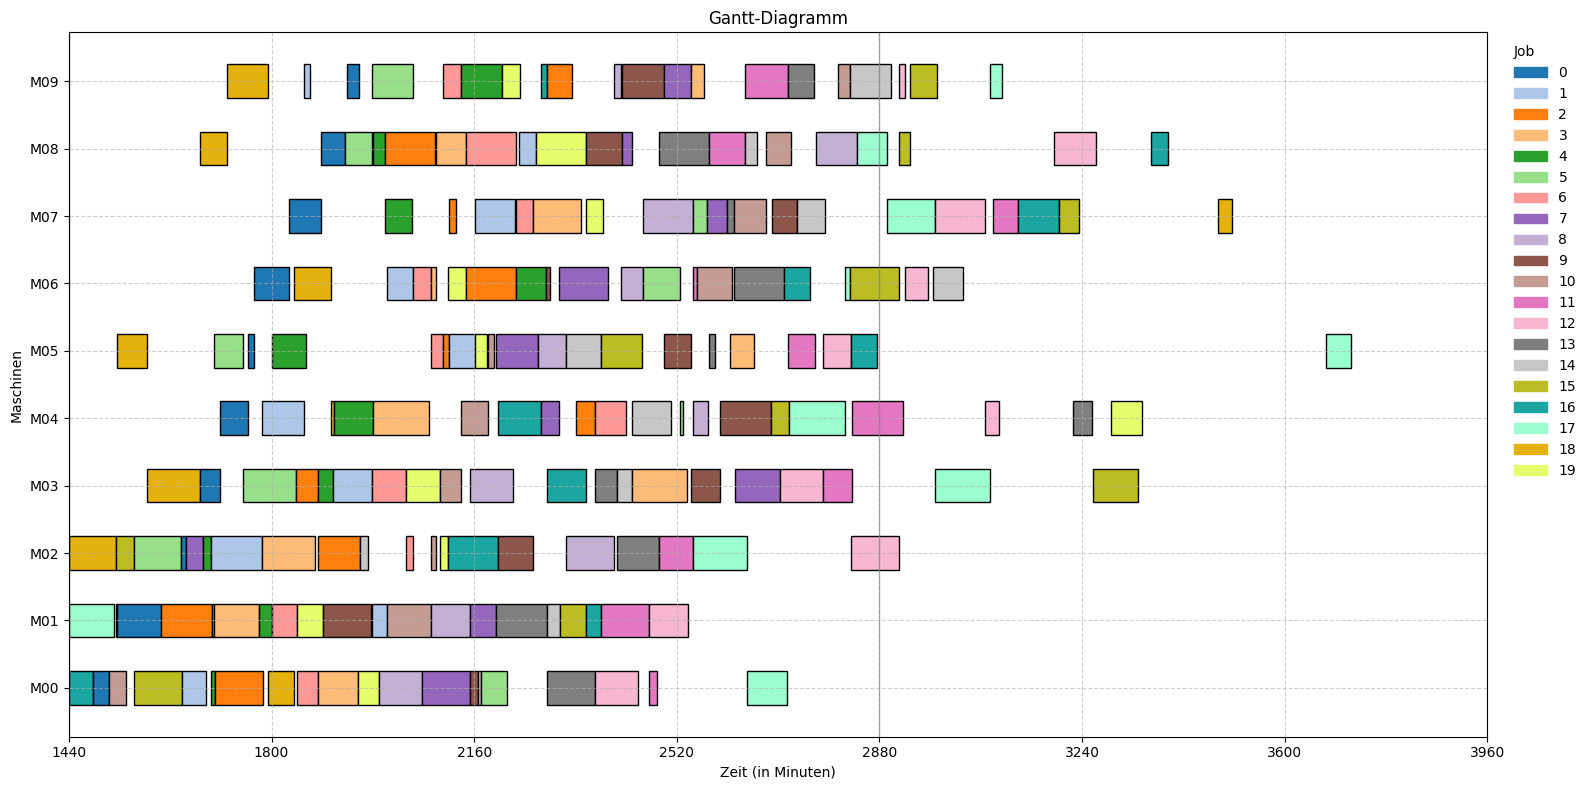

+ Keine Maschinenkonflikte gefunden
+ Alle Gruppen wurden in korrekter Operationsreihenfolge ausgeführt.
+ Alle technologischen Abhängigkeiten wurden eingehalten.
+ Alle Operation starten erst nach Arrival des Job


True

In [24]:
show.plot_gantt(df_schedule, perspective="Machine")
check.is_machine_conflict_free(df_schedule)
check.is_operation_sequence_correct(df_schedule)
check.is_job_timing_correct(df_schedule)
check.is_start_correct(df_schedule)